In [138]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as t
import os

In [139]:
def process(log_dir: str) -> np.ndarray:
    means, stderrs = list(), list()
    for file in os.listdir(log_dir):
        df = pd.read_csv(os.path.join(log_dir, file))
        means.append(np.mean(df.processing_time))
        stderrs.append(t.sem(df.processing_time))
    return np.array(means, dtype=np.float32), np.array(stderrs, dtype=np.float32)

### Java (gRPC, Sandbox)

In [140]:
d1_mean, d1_stderr = process('data/find_delay/Sandbox/java')

### Python (gRPC, Sandbox)

In [141]:
d2_mean, d2_stderr = process('data/find_delay/Sandbox/python')

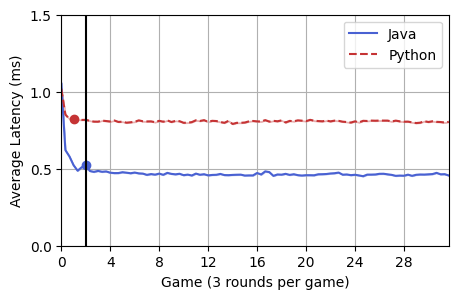

In [142]:
fig, ax = plt.subplots(figsize=(5, 3))
color_map = mpl.colormaps['coolwarm']
ax.set_xlabel("Game (3 rounds per game)")
ax.set_ylabel("Average Latency (ms)")
ax.set_xticks(np.arange(0, 97, 12))
ax.set_yticks(np.arange(0.0, 2.1, 0.5   ))
ax.set_xticklabels([str(x) for x in np.arange(0, 33, 4)])
ax.set_xlim(0, 95)
ax.set_ylim(0, 1.5)
ax.plot(np.arange(len(d1_mean)), d1_mean, '-', color=color_map(0.05), label='Java')
ax.fill_between(np.arange(len(d1_mean)), d1_mean-d1_stderr, d1_mean+d1_stderr, color=color_map(0.05), alpha=0.3)
ax.plot(np.arange(len(d2_mean)), d2_mean, '--', color=color_map(0.95), label='Python')
ax.fill_between(np.arange(len(d2_mean)), d2_mean-d2_stderr, d2_mean+d2_stderr, color=color_map(0.95), alpha=0.3)
ax.plot(6, d1_mean[6], 'o', color=color_map(0.05)) # Java stable
ax.plot(3, d2_mean[3], 'o', color=color_map(0.95)) # Python stable
ax.axvline(6, linestyle='-', color='black')
ax.legend(loc="upper right")
ax.grid(True)

In [143]:
avg1 = np.mean(d1_mean[6:])
avg2 = np.mean(d2_mean[6:])
diff = np.abs(avg1 - avg2)
print(avg1, avg2, diff)

0.46519166 0.8072498 0.34205812
